# <span style="color:blue">**Capítulo 10**</span>
## <font color=blue size=8> Clustering Basado en Conectividad </font>
### Clustering Construido en una Estructura Tipo Árbol

## Clustering Aglomerativo

### En Resumen 

El clustering aglomerativo (AGNES) agrupa tu conjunto de datos construyendo una estructura jerárquica tipo árbol. Utiliza un enfoque de abajo hacia arriba mientras construye el árbol. Es más informativo que el conjunto no estructurado de clusters planos creado por el clustering K-means. A diferencia de K-means, donde necesitas especificar el valor de $K$ al inicio, en AGNES no tienes que especificar el número de clusters. El enfoque de abajo hacia arriba trata cada punto de datos como un solo cluster al principio. El algoritmo entonces aglomera sucesivamente pares de clusters. El proceso continúa hasta que fusionamos todos los puntos de datos en un solo cluster. Vemos esto en la figura 10.1. El dendrograma a la derecha muestra la estructura del árbol.

<div>
  <img src="content/fig10.1.png" width="650"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.1</p>

<p>Distribución de datos y dendrograma.</p>

### Funcionamiento  

Implementar AGNES es trivial. Estos son los pasos en el algoritmo:  
1. Que cada punto de datos represente un cluster.  
2. Calcular la matriz de proximidad de otros puntos de datos usando alguna medida como distancia Euclidiana o Manhattan.  
3. Fusionar dos clusters más cercanos y actualizar la matriz de proximidad.  
4. Repetir el paso 3 hasta que un solo cluster permanezca al final.  

A partir de este funcionamiento, puedes entender fácilmente cómo se forma el clustering jerárquico con un solo cluster delimitador en el exterior.  

Mientras se actualiza la matriz de proximidad en el paso 3 anterior, consideramos tres diferentes enlaces entre los clusters. Estos son:  
- Sinmple  
- Completo  
- Promedio  

Ahora describiré estos tres enlaces.

#### Enlace Simple  

En el enlace simple, la distancia entre dos clusters es el valor mínimo de todas las distancias por pares entre los elementos de los dos clusters $C_1$ y $C_2$. Esto también se conoce como enlace mínimo.  

La distancia mínima se calcula usando la siguiente fórmula:  

$$
\text{dist}_{\min}(C_1, C_j) = \frac{\min}{p \in C_1,\; p' \in C_j}\; |p - p'|
$$

donde $|p - p'|$ es la distancia entre dos objetos o puntos — $C_i$ y $C_j$.  

La fórmula también puede escribirse de la siguiente manera:  

$$
\text{Dist}(C_1, C_2) = \min \, (\text{Dist}(i,j)), \quad i \in C1 \; \text{y} \; j \in C2
$$

#### Enlace Completo 

En este tipo de enlace, la distancia entre dos clusters es el máximo de todas las distancias por pares entre los elementos de los dos clusters $C_1$ y $C_2$. Esto también se conoce como enlace máximo.  

La distancia máxima se calcula usando la siguiente fórmula:  

$$
\text{dist}_{\max}(C_1, C_j) = \frac{\max}{p \in C_1,\; p' \in C_j}\; |p - p'|
$$  

donde $|p - p'|$ es la distancia entre dos objetos o puntos en $C_i$ y $C_j$.  

La fórmula también puede escribirse de la siguiente manera:  

$$
\text{Dist}(C_1, C_2) = \max \,( \text{Dist}(i,j)), \quad i \in C_1 \; \text{y} \; j \in C_2
$$

#### Enlace Promedio  

En este tipo de enlace, consideramos la distancia promedio, en lugar del mínimo o el máximo. Esto también se llama UPGMA—*unweighted pair group mean averaging*.  

El promedio se calcula usando la siguiente fórmula:  

$$
\text{dist}_{\text{avg}}(C_1, C_j) = \frac{1}{n_1 n_j} \sum_{p \in C_1, \, p' \in C_j} |p - p'|
$$  

donde, como en los casos anteriores, $|p - p'|$ es la distancia entre dos objetos o puntos en $C_i$ y $C_j$.  

La fórmula de la distancia también puede escribirse como:  

$$
\text{Dist}(C_1, C_2) = \frac{1}{n_{C_1} + n_{C_2}} \sum_{i=1}^{C_1} \sum_{j=1}^{C_2} \text{Dist}(i,j), \quad i \in C_1 \; \text{y} \; j \in C_2
$$  

donde:  
- $n_{C_1} = $ Número de elementos o puntos de datos en $C_1$  
- $n_{C_2} = $ Número de elementos o puntos de datos en $C_2$

#### Trazado de Dendrogramas

In [81]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [82]:
a = np.random.random_sample(size = 10)
b = np.random.random_sample(size = 10)
point = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')

In [83]:
data

,a,b
Point,,
P1,0.13,0.83
P2,0.18,0.90
P3,0.92,0.77
P4,0.35,0.54
P5,0.30,0.29
P6,0.28,0.13
P7,0.99,0.25
P8,0.15,0.24
P9,0.11,0.64


Dependiendo del tipo de enlace, los dendrogramas generados serían diferentes.  
Considera la distribución mostrada en la figura 10.2.  

Text(0.5, 1.0, 'Diagrama de Dispersión de x e y')

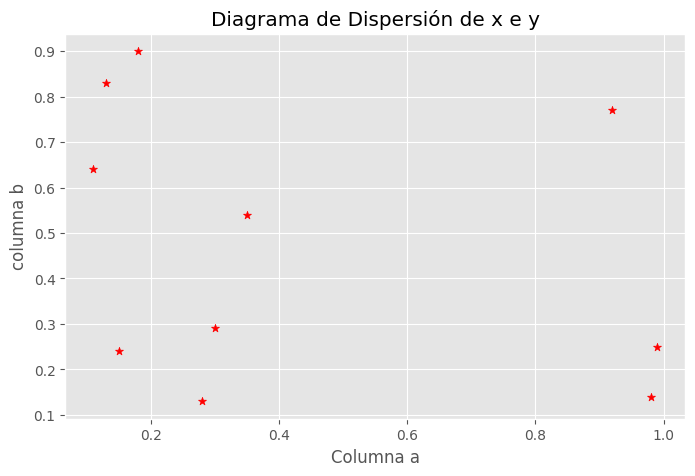

In [84]:
plt.style.use(['ggplot'])
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='*')
plt.xlabel('Columna a')
plt.ylabel('columna b')
plt.title('Diagrama de Dispersión de x e y')

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.2</p>

<p>Distribución aleatoria de datos.</p>

In [85]:
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)

In [86]:
dist

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,0.000000,0.086023,0.792275,0.364005,0.566127,0.715891,1.037304,0.590339,0.191050,1.094806
P2,0.086023,0.000000,0.751332,0.398121,0.621691,0.776466,1.038557,0.660681,0.269258,1.103449
P3,0.792275,0.751332,0.000000,0.614654,0.784092,0.905097,0.524690,0.934773,0.820366,0.632851
P4,0.364005,0.398121,0.614654,0.000000,0.254951,0.415933,0.702638,0.360555,0.260000,0.746257
P5,0.566127,0.621691,0.784092,0.254951,0.000000,0.161245,0.691158,0.158114,0.398246,0.696348
P6,0.715891,0.776466,0.905097,0.415933,0.161245,0.000000,0.720069,0.170294,0.537587,0.700071
P7,1.037304,1.038557,0.524690,0.702638,0.691158,0.720069,0.000000,0.840060,0.962549,0.110454
P8,0.590339,0.660681,0.934773,0.360555,0.158114,0.170294,0.840060,0.000000,0.401995,0.836002
P9,0.191050,0.269258,0.820366,0.260000,0.398246,0.537587,0.962549,0.401995,0.000000,1.003444
P10,1.094806,1.103449,0.632851,0.746257,0.696348,0.700071,0.110454,0.836002,1.003444,0.000000


Los dendrogramas generados para los tres tipos de enlaces sobre este conjunto de datos se muestran en la figura 10.3.  

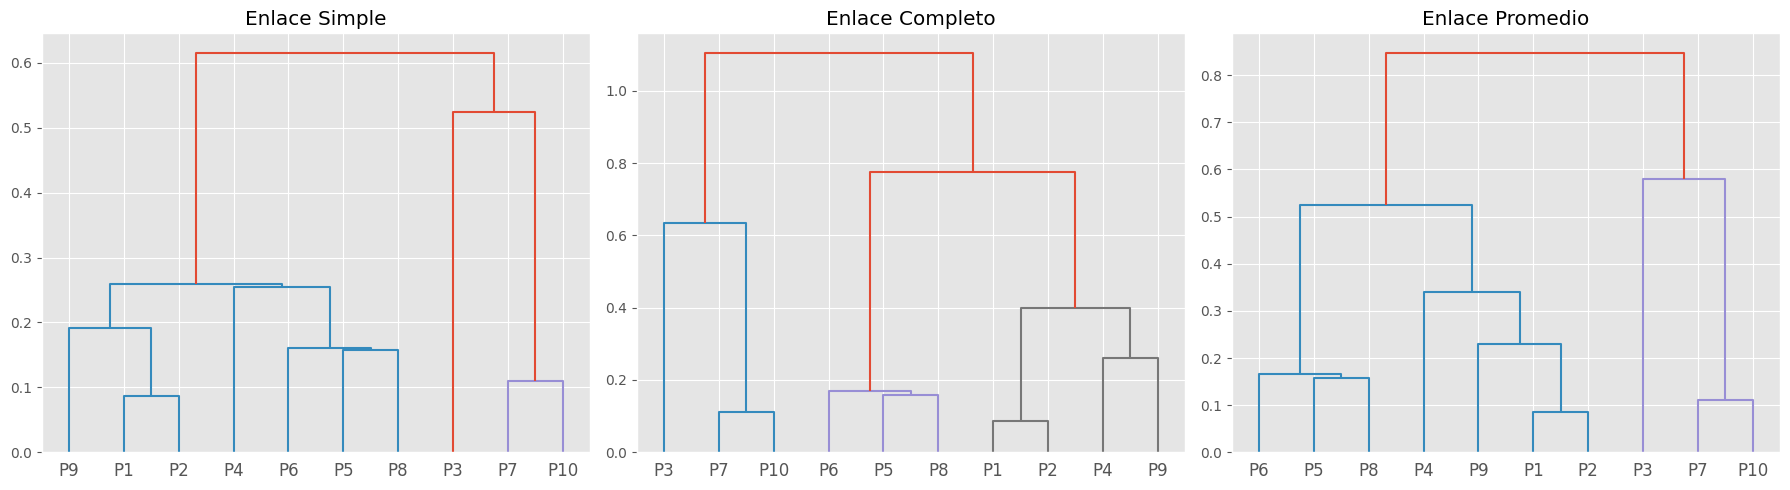

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

axes[0].set_title("Enlace Simple")
shc.dendrogram(shc.linkage(data[['a', 'b']], method='single'), labels=data.index, ax=axes[0])

axes[1].set_title("Enlace Completo")
shc.dendrogram(shc.linkage(data[['a', 'b']], method='complete'), labels=data.index, ax=axes[1])

axes[2].set_title("Enlace Promedio")
shc.dendrogram(shc.linkage(data[['a', 'b']], method='average'), labels=data.index, ax=axes[2])

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.3</p>

<p>Dendrogramas para diferentes tipos de enlaces.</p>

Aunque las estructuras de árbol creadas en los tres casos son diferentes, el efecto del clustering permanece igual.

### Ventajas y Desventajas 

Aquí hay algunas ventajas de AGNES:  
- No necesitas especificar el número de clusters como en el caso del clustering K-means.  
- Es fácil de implementar y fácil de entender.  
- La jerarquía del árbol es muchas veces más informativa que el conjunto no estructurado de clusters planos devuelto por el clustering K-means.  

Aquí hay algunas desventajas de AGNES:  
- Durante el clustering, el proceso de fusión de clusters no se puede revertir. Esto puede volverse problemático en conjuntos de datos ruidosos o de alta dimensión.  
- Para grandes volúmenes de datos, el clustering podría volverse computacionalmente costoso.  

Finalmente, te daré algunos casos de uso donde AGNES ha dado resultados satisfactorios o puede ser utilizado.

### Aplicaciones  

- El clustering jerárquico es útil para determinar el árbol filogenético de la evolución animal.  
- Puedes rastrear virus trazando árboles filogenéticos.  
- Podemos analizar filogenéticamente la bacteria de la saliva.  
- Podemos usar el algoritmo para clasificación de documentos, donde documentos similares pueden organizarse analizando la similitud del texto.  
- También podemos usar el algoritmo para apoyar ventas y marketing. Puedes agrupar clientes que tengan rasgos similares y probabilidad de interés en tus productos y servicios, lo cual usarías para diseñar tus estrategias.

### Implementación  

*sklearn* implementa el clustering aglomerativo con la clase `AgglomerativeClustering` de *sklearn.clustering*. Puedes especificar el número de clusters, la métrica de afinidad y el tipo de enlace durante la instanciación.  

```python
hc = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward"
)

Ilustraré cómo se realiza el clustering aglomerativo usando la clase anterior con un proyecto trivial.

### Proyecto

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [89]:
dataset = pd.read_csv('content/Mall_Customers.csv') 

In [90]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Probé el clustering aglomerativo en el [conjunto de datos](https://www.kaggle.com/datasets/shwetabh123/mall-customers) de clientes del centro comercial tomado de *Kaggle*.  
La segmentación de clientes se realiza en función de su ingreso anual y edad.  
Primero, haremos el clustering basado en el ingreso anual. Este fragmento de código formará dos clusters en todo el conjunto de datos para proporcionarnos la segmentación de la capacidad de gasto de los clientes basada en su ingreso anual.

#### Clustering Por Ingreso Anual

In [92]:
X = dataset.iloc[:, [3,4]].values

In [93]:
# creando el objeto hc de la clase AgglomerativeClustering()
hc=AgglomerativeClustering(n_clusters=2, metric="euclidean",linkage="ward")

In [94]:
# proporciona una matriz que indica qué punto de datos pertenece a qué clúster
y_hc=hc.fit_predict(X)

In [95]:
#  convirtiendo x en ndarray
x=np.array(X)

La salida es un array que nos indica a qué cluster pertenece cada punto de datos — 1 o 2. Puedes graficar los clusters usando el siguiente fragmento de código. La figura 10.4 muestra la salida.  

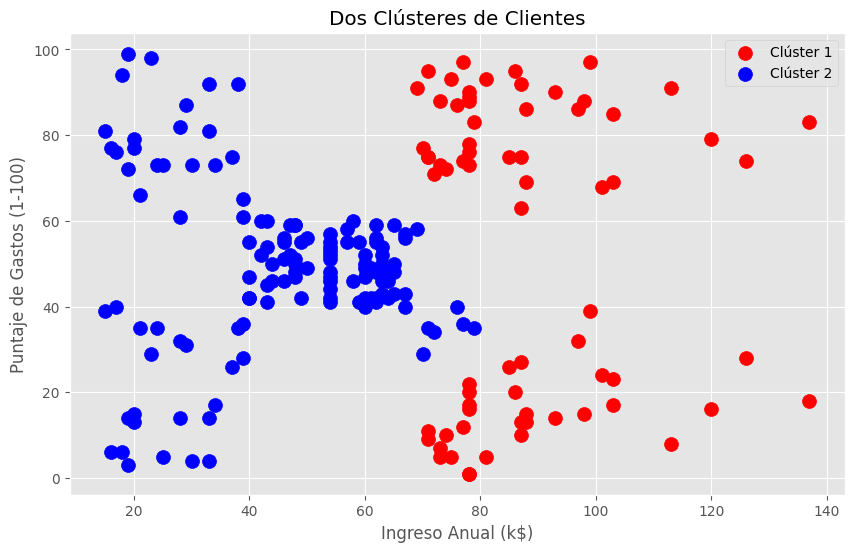

In [96]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Clúster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Clúster 2')
plt.title('Dos Clústeres de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gastos (1-100)')
plt.legend()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.4</p>

<p>Clustering aglomerativo en un conjunto de datos de la vida real.</p>

Como puedes observar, los clientes con ingresos medios (40-55K) presentan una capacidad de gasto promedio. Cuando realizan compras, no es ni demasiado baja ni demasiado alta. 

Para investigaciones adicionales, puedes intentar hacer clustering del mismo conjunto de datos en tres o cuatro clusters. La figura 10.5 muestra los resultados.  

In [97]:
hc=AgglomerativeClustering(n_clusters=3, metric="euclidean",linkage="ward")
y_hc=hc.fit_predict(X)
x=np.array(X)

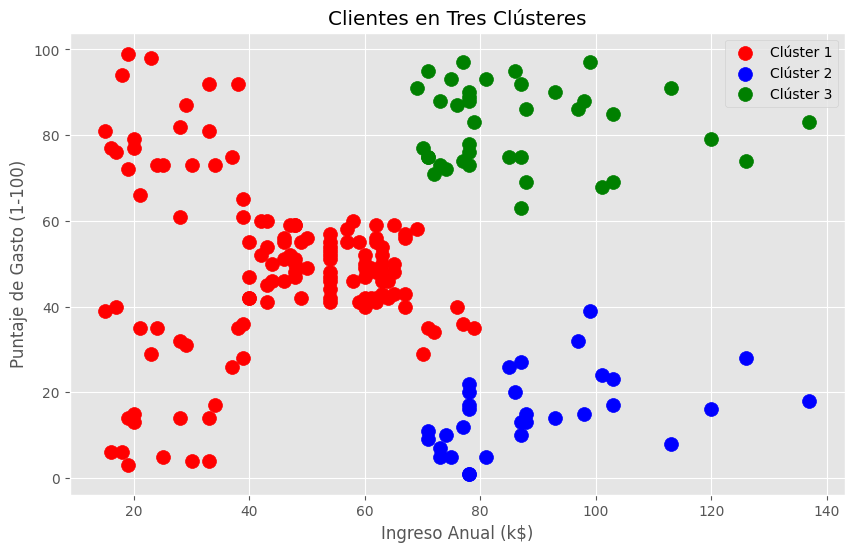

In [98]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Clúster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Clúster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Clúster 3')
plt.title('Clientes en Tres Clústeres')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.show()

In [99]:
hc=AgglomerativeClustering(n_clusters=4, metric="euclidean",linkage="ward")
y_hc=hc.fit_predict(X)
x=np.array(X)

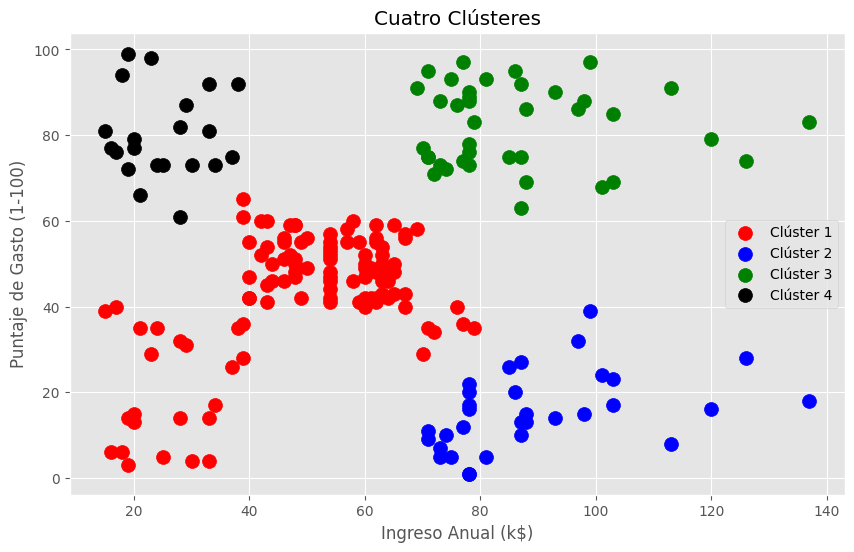

In [100]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Clúster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Clúster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Clúster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'black', label = 'Clúster 4')
plt.title('Cuatro Clústeres')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.5</p>

<p>Diferentes tamaños de clústeres con agrupamiento aglomerativo.</p>

Ahora puedes hacer el análisis observando estas visualizaciones para entender la capacidad de gasto de los clientes dependiendo de su ingreso anual.

#### Clustering Por Edades

Puedes hacer un análisis similar basado en la edad de los clientes. 

In [101]:
Y = dataset.iloc[:, [2,4]].values

In [102]:
hc=AgglomerativeClustering(n_clusters=3, metric="euclidean",linkage="ward")
yy_hc=hc.fit_predict(Y)

In [103]:
y=np.array(Y)

La salida de 3 clusters basada en la edad se muestra en la figura 10.6.  

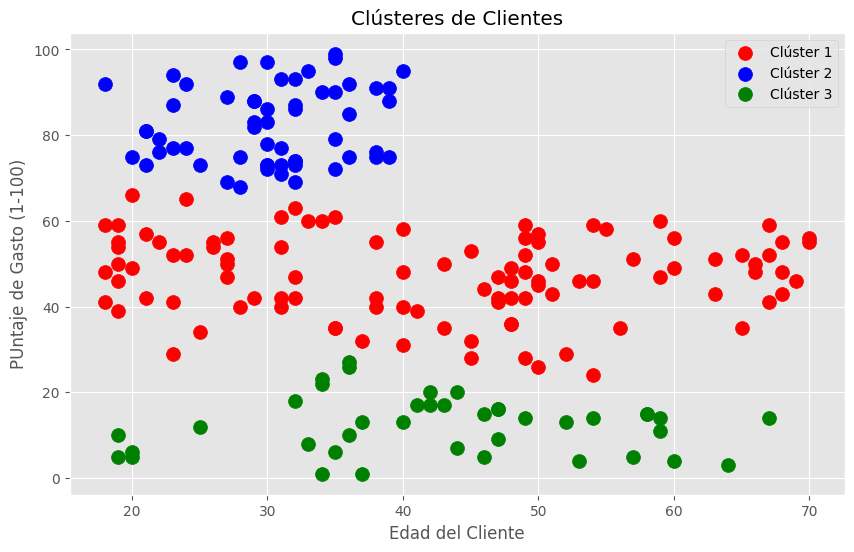

In [104]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(y[yy_hc == 0, 0], y[yy_hc == 0, 1], s = 100, c = 'red', label = 'Clúster 1')
plt.scatter(y[yy_hc == 1, 0], y[yy_hc == 1, 1], s = 100, c = 'blue', label = 'Clúster 2')
plt.scatter(y[yy_hc == 2, 0], y[yy_hc == 2, 1], s = 100, c = 'green', label = 'Clúster 3')

plt.title('Clústeres de Clientes')
plt.xlabel('Edad del Cliente')
plt.ylabel('PUntaje de Gasto (1-100)')
plt.legend()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.6</p>

<p>Clustering Aglomerativo por el Puntaje de Gasto y Edad del Cliente.</p>

Como curiosidad, también puedes revisar el dendrograma. La figura 10.7 muestra el resultado.

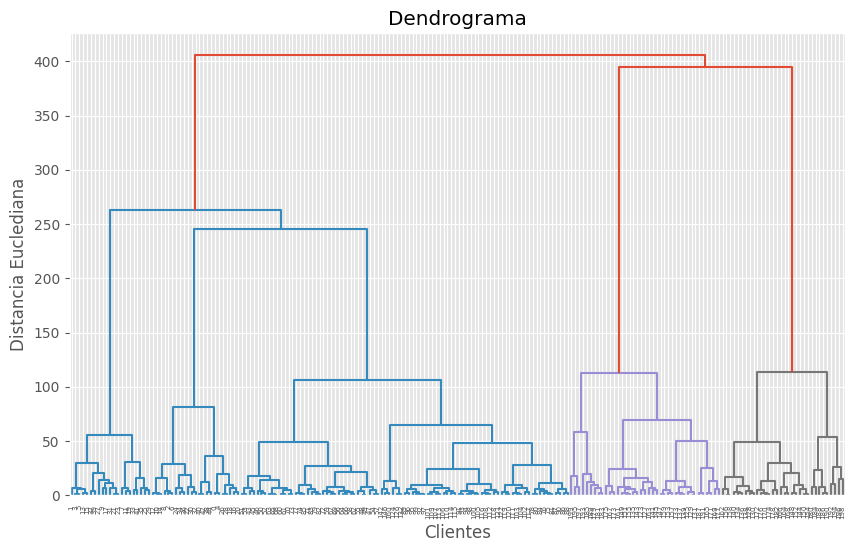

In [105]:
fig = plt.figure(figsize=(10, 6))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclediana")
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.7</p>

<p>Dendrograma para un conjunto de datos de la vida real.</p>

## Clustering Divisivo

### En Resumen  

También conocido como DIANA o análisis divisivo, esta técnica es bastante similar al clustering aglomerativo, excepto que utiliza un enfoque de arriba hacia abajo en lugar del enfoque de abajo hacia arriba usado en AGNES. Comienza colocando todos los puntos de datos en un solo cluster, que se convierte en la raíz del árbol a construir. El cluster raíz luego se divide recursivamente en clusters más pequeños hasta que cada cluster en la parte inferior sea lo suficientemente coherente. Los clusters en el nivel inferior son adecuadamente similares entre sí o contienen un solo elemento. La figura 10.8 muestra la formación de clusters en el clustering divisivo.

<div>
  <img src="content/fig10.8.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.8</p>

<p>Esquema de agrupamiento divisivo.</p>

### Funcionamiento  

Implementar el clustering divisivo no es tan trivial como AGNES. Primero explicaré el algoritmo y más adelante discutiré los desafíos en su implementación. El algoritmo tiene los siguientes pasos simples:  

1. Poner todos los puntos de datos en un solo cluster.  
2. Particionar el cluster en dos clusters menos similares usando alguna técnica de medición de distancia, como la distancia Euclidiana.  
3. Repetir el paso 2 de manera recursiva hasta que quede un solo objeto en cada cluster o, como máximo, los objetos que sean muy similares.  

De manera diagramática, todo el proceso puede explicarse de la siguiente forma:  
Considera la distribución de datos mostrada en la figura 10.9.

<div>
  <img src="content/fig10.9.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.9</p>

<p>Conjunto de Datos Aleatorio.</p>

Comenzamos colocando todos los puntos de datos en un solo cluster y luego lo dividimos recursivamente hasta obtener un conjunto de clusters donde cada cluster es coherente. La figura 10.10 muestra las distintas etapas.  

<div>
  <img src="content/fig10.10.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 10.10</p>

<p>Pasos en la formación de clústeres.</p>

Como se ve en el diagrama, hemos detenido el proceso después del paso 4 considerando que cada cluster más interno es suficientemente coherente. Si no, se pueden continuar con divisiones adicionales.  
El proceso parece simple; sin embargo, su implementación presenta varios desafíos.

### Desafíos de Implementación  

1. El mayor desafío es seleccionar la partición apropiada al dividir un cluster. Ten en cuenta que hay $2^{n-1}-1$ formas potenciales de particionar un conjunto de $n$ objetos en dos clusters exclusivos. Cuando $n$ es grande, esto puede ser computacionalmente intensivo si decides examinar todas las combinaciones.  
2. El algoritmo utiliza heurísticas en la partición que pueden llevar a imprecisiones.  
3. El algoritmo típicamente no retrocede en sus decisiones. Una vez que el cluster se particiona, no reconsidera una partición alternativa y simplemente procede con divisiones adicionales.  

Debido a los desafíos anteriores, muchas veces los científicos de datos prefieren métodos aglomerativos sobre los divisivos. La librería *sklearn* no proporciona la implementación para clustering divisivo.  

### Resumen  

En este capítulo, aprendiste dos algoritmos de clustering basados en jerarquía—aglomerativo y divisivo.  
El clustering aglomerativo toma un enfoque de abajo hacia arriba, donde comienzas con cualquier punto arbitrario en el conjunto de datos como un cluster. Luego añades los puntos cercanos usando una métrica de proximidad. Continúas agregando más puntos a este cluster hasta que hayas visitado todos los puntos en el conjunto de datos. Esto te da una jerarquía de todos los puntos de datos en el conjunto. Usas esta jerarquía para decidir tus clusters. El clustering divisivo funciona de manera opuesta—construye el árbol de arriba hacia abajo. Comienzas considerando un solo cluster con todos los puntos de datos del conjunto. Divides este cluster usando una métrica de proximidad. La división continúa hasta que te quedas con clusters de un solo punto en la parte inferior. 

Debido a la complejidad del algoritmo divisivo, consideramos solo el método aglomerativo de clustering basado en enlaces. 